# Simpson's Paradox :

Problem : In 1973, the University of California-Berkeley (UC-Berkeley) was sued for sex discrimination. Its admission data showed that men applying to graduate school at UC-Berkley were more likely to be admitted than women. Is this true? Lets explore the problem using released data about their graduate class!!

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("berkeley.csv")
df

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
...,...,...,...,...
12758,1973,Other,M,Accepted
12759,1973,D,M,Accepted
12760,1973,Other,F,Rejected
12761,1973,Other,M,Rejected


**The data showed the major the applicant applied to, their self-reported gender (Male or Female), and whether or not they were accepted or rejected**

In [4]:
#Check for null values
df.isna().sum()

Year         0
Major        0
Gender       0
Admission    0
dtype: int64

In [6]:
#descriptive statistics for the categorical columns in the DataFrame df
df.describe()

,Year
count,12763.0
mean,1973.0
std,0.0
min,1973.0
25%,1973.0
50%,1973.0
75%,1973.0
max,1973.0


*The data is 1973 admissions data and there are 12763 rows of data.*

In [7]:
df.describe(include=['O'])

,Major,Gender,Admission
count,12763,12763,12763
unique,7,2,2
top,Other,M,Rejected
freq,7924,8442,7531


In [8]:
# descriptive statistics for the categorical columns in the DataFrame df
df['Gender'].value_counts()

M    8442
F    4321
Name: Gender, dtype: int64

In [26]:
#group the rows based on the unique combinations of 'Gender' and 'Admission' and display the count
overall_acceptance_ratio = df.groupby(['Gender','Admission']).size().unstack()
overall_acceptance_ratio

Admission,Accepted,Rejected
Gender,,
F,1494,2827
M,3738,4704


In [28]:
# Calculate acceptance rate segregated by gender
overall_acceptance_ratio['Accepted Ratio'] = overall_acceptance_ratio['Accepted']/(overall_acceptance_ratio['Accepted']+overall_acceptance_ratio['Rejected'])
overall_acceptance_ratio

Admission,Accepted,Rejected,Accepted Ratio
Gender,,,
F,1494,2827,0.345753
M,3738,4704,0.442786


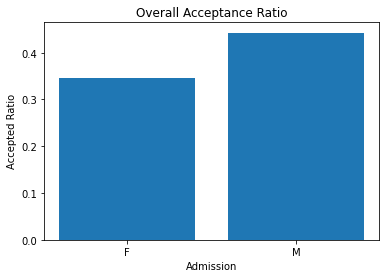

In [29]:
# Create a bar plot
plt.bar(overall_acceptance_ratio.index, overall_acceptance_ratio['Accepted Ratio'])

# Add labels and title
plt.xlabel('Admission')
plt.ylabel('Accepted Ratio')
plt.title('Overall Acceptance Ratio')

# Show the plot
plt.show()

So, Indeed the claim is true and is a case for sex discrimination!!. The graduate schools had accepted 44% of male applicants but only 35% of female applicants. Hmm..But wait a minute, you never want to blindly compare everyone in the treatment group to everyone in the control group because sometimes Simpson's Paradox can occur. 
Lets first make sure that this is not a potential instance of Simpson's paradox. 

**Wait a minute! What is Simpson's Paradox?**
Simpson's paradox is a statistical phenomenon where a trend or relationship appears in different groups of data, but disappears or reverses when the groups are combined. It can lead to misleading or contradictory conclusions if not properly understood and analyzed.

**So Was Berkeley Biased?**
Befor jumping into conclusions lets explore the other varibles of the dataset 'Major'. Generally, the stratifying the data reveals patterns that might help us answer and better respond to the question.

In [115]:
#group the rows based on the unique combinations of 'Gender', Major and 'Admission' and display the count
acceptance_ratio_by_major = df.groupby(['Gender','Admission','Major']).size().unstack()

In [133]:
# Transpose the DataFrame to have Gender, Admission, and Major as columns
transposed_df = acceptance_ratio_by_major.T
transposed_df

Gender           F                 M         
Admission Accepted Rejected Accepted Rejected
Major                                        
A               89       19      825      313
B               17        8      353      207
C              201      392      120      205
D              131      244      138      279
E               94      299       53      138
F               25      316       22      351
Other          937     1549     2227     3211

In [134]:
transposed_df.columns

MultiIndex([('F', 'Accepted'),
            ('F', 'Rejected'),
            ('M', 'Accepted'),
            ('M', 'Rejected')],
           names=['Gender', 'Admission'])

In [135]:
transposed_df.columns = [''.join(col) for col in transposed_df.columns.values]
transposed_df

,FAccepted,FRejected,MAccepted,MRejected
Major,,,,
A,89,19,825,313
B,17,8,353,207
C,201,392,120,205
D,131,244,138,279
E,94,299,53,138
F,25,316,22,351
Other,937,1549,2227,3211


In [136]:
# Calculate the acceptance percentages for female and male applicants
def calculate_acceptance_percentage(accepted, rejected):
    return (accepted / (accepted + rejected)) * 100


In [137]:
# Calculate the acceptance percentage for female applicants
transposed_df['FAcceptance_Percentage_by_Major'] = transposed_df.apply(lambda row: calculate_acceptance_percentage(row['FAccepted'], row['FRejected']), axis=1)

In [138]:
# Calculate the acceptance percentage for male applicants
transposed_df['MAcceptance_Percentage_by_Major'] = transposed_df.apply(lambda row: calculate_acceptance_percentage(row['MAccepted'], row['MRejected']), axis=1)

In [139]:
transposed_df

,FAccepted,FRejected,MAccepted,MRejected,FAcceptance_Percentage_by_Major,MAcceptance_Percentage_by_Major
Major,,,,,,
A,89,19,825,313,82.407407,72.495606
B,17,8,353,207,68.000000,63.035714
C,201,392,120,205,33.895447,36.923077
D,131,244,138,279,34.933333,33.093525
E,94,299,53,138,23.918575,27.748691
F,25,316,22,351,7.331378,5.898123
Other,937,1549,2227,3211,37.691070,40.952556


**Now, We can see that when we stratify based on major, the “bias” goes away!!. Most individual majors favored women or had very similar acceptance rates.**

**Discussion: What happened?**

During that semester, it was observed that more men applied to majors A and B, which were considered "easier to get into." Both of these majors had an acceptance rate of over 50%. On the other hand, more women applied to majors C-F, which were known to be "harder to get into." These majors had significantly lower acceptance rates, all below 50%. This data at UC-Berkeley seemed to indicate a disparity in admission rates between men and women, but upon further analysis, it was discovered that Simpson's Paradox was at play.

Simpson's Paradox occurs when a confounding variable, in this case, the choice of major, heavily influences the outcome and leads to a reversal of the observed trend. By stratifying the data based on majors, a more accurate comparison was made. It allowed for a direct comparison between women who applied to major A and men who applied to major A, women who applied to major B and men who applied to major B, and so on. These comparisons provided a clearer understanding of the situation and revealed that the initial apparent bias against women was not present when considering similar majors.

Through this analysis, it became evident that UC-Berkeley's admission process was not biased. Instead, Simpson's Paradox emerged due to the extreme influence of the confounding variable, major choice.

Happy Reading!!

Hope you find this useful!!



